In [61]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# データの特徴を確認
wine_df = pd.read_csv("wine_train.csv")
# データ概要
wine_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.224968,0.341049,0.318244,5.443751,0.055974,30.447335,115.400127,0.994712,3.218765,0.532034,10.494155,5.823358
std,1.304770,0.165021,0.144244,4.773600,0.035296,17.818565,56.886823,0.003026,0.160566,0.149066,1.196213,0.875998
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992320,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [63]:
# 欠損値の確認
wine_df.isnull().sum()

type                    0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [64]:
# カテゴリカル変数の確認
wine_df.head()

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,W,5.8,0.180,0.37,1.1,0.036,31.0,96.0,0.98942,3.16,0.48,12.0,6
1,R,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
2,R,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
3,W,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
4,W,7.9,0.350,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0,5


In [65]:
# typeのみカテゴリカル変数
# ダミー変数を設定
dummy_df = pd.get_dummies(wine_df[['type']], drop_first = True) 
wine_df = pd.merge(wine_df, dummy_df, left_index=True, right_index=True)
# 元データのtypeは不要なため削除
wine_df = wine_df.drop(["type"], axis=1)
wine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type_W
0,5.8,0.180,0.37,1.1,0.036,31.0,96.0,0.98942,3.16,0.48,12.0,6,1
1,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7,0
2,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5,0
3,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6,1
4,7.9,0.350,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0,5,1


In [66]:
#　説明変数の重要度を抽出
# 目的変数の設定
Y = wine_df.quality.values
# 説明変数の設定
# 目的変数のqualityを削除
wine_df = wine_df.drop(["quality"], axis=1)
X = wine_df.as_matrix()
# 説明変数のラベル名を取り出す
labels = wine_df.columns.values

In [67]:
# モデル構築、学習
from sklearn.ensemble import RandomForestClassifier
# 木の数=1000
model = RandomForestClassifier(n_estimators=10000)
# モデルに適合
model.fit(X, Y)
# 特徴量の重要度を抽出
importances = model.feature_importances_
importances, labels = zip(*sorted(zip(importances, labels)))

for label,impt in zip(labels, importances):
    print("%-*s %f" % (30, label, impt))

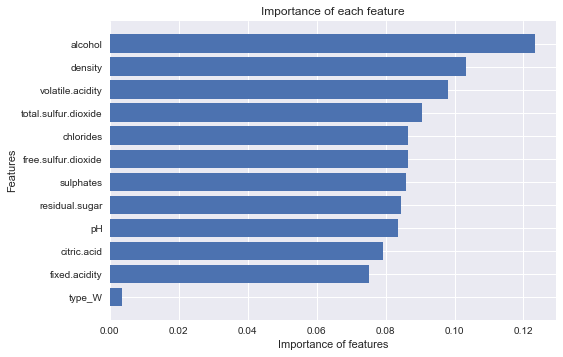

In [68]:
# 可視化
plt.barh(range(len(labels)), importances, align='center')
plt.yticks(range(len(labels)), labels)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [85]:
#  学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [86]:
# モデル構築、学習
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [88]:
# 検証用データの精度
model.score(X_test, y_test)

0.66424242424242419

In [94]:
# 予測データを整形
wine_test_df = pd.read_csv("wine_test.csv")
dummy_test_df = pd.get_dummies(wine_test_df[['type']], drop_first = True) 
wine_test_df = pd.merge(wine_test_df, dummy_test_df, left_index=True, right_index=True)
wine_test_df = wine_test_df.drop(["type"], axis=1)
wine_test_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,type_W
0,8.0,0.810,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2,0
1,7.3,0.590,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,0
2,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,1
3,5.8,0.200,0.16,1.4,0.042,44.0,99.0,0.98912,3.23,0.37,12.2,1
4,8.0,0.260,0.28,8.2,0.038,72.0,202.0,0.99566,3.12,0.56,10.0,1


In [102]:
# 予測
X_test = wine_test_df.as_matrix()
print(model.predict(X_test))


[5 5 7 6 6 6 7 5 6 6 6 6 6 6 6 5 6 7 5 5 6 7 6 6 5 6 6 6 5 6 7 7 6 5 6 6 5
 5 6 6 6 7 5 6 6 6 7 6 6 6 6 5 5 6 7 5 5 7 5 6 6 7 6 7 6 7 5 7 6 6 6 6 6 6
 5 5 6 5 6 5 6 6 5 7 6 6 6 6 5 6 6 5 6 6 6 6 6 6 5 5 6 5 6 5 6 5 6 5 5 6 6
 5 5 5 5 6 6 6 6 6 5 6 6 5 6 6 6 6 6 6 6 6 6 5 5 5 5 5 6 6 6 5 5 5 6 5 5 5
 6 6 5 7 5 5 6 6 6 8 5 8 5 6 6 6 6 6 7 6 7 6 6 5 6 6 5 5 6 6 6 6 6 7 6 6 6
 6 5 7 6 6 5 6 6 5 6 5 6 6 5 5 6 5 5 7 5 5 5 6 5 6 6 6 6 5 6 6 6 6 6 6 6 5
 6 7 5 5 6 6 6 5 6 5 7 5 6 5 5 5 6 6 5 6 6 6 5 7 5 6 6 6 6 6 5 6 6 7 7 6 6
 6 6 6 6 7 5 7 5 7 6 5 6 5 5 5 6 7 6 7 5 5 6 5 6 6 5 6 5 7 5 8 6 5 7 6 6 6
 5 6 5 6 6 6 6 6 5 6 6 6 6 6 5 6 7 6 5 5 5 6 5 6 5 6 6 7 7 6 6 6 5 6 7 7 7
 6 5 6 6 5 5 5 6 6 5 5 5 6 6 5 7 6 8 7 6 6 6 6 7 4 6 6 5 6 6 5 5 5 5 5 6 6
 6 6 6 5 5 5 5 5 8 6 6 6 5 6 5 6 5 5 7 5 6 5 6 6 6 6 5 5 6 6 6 6 6 6 8 5 5
 5 5 7 4 6 6 6 5 6 6 6 6 6 5 5 6 6 6 6 6 6 6 6 6 6 5 6 6 5 5 6 6 6 6 5 6 6
 7 7 6 7 7 7 5 7 5 5 5 6 5 6 5 6 5 6 6 5 5 6 5 6 5 6 6 8 5 6 6 6 6 6 6 5 6
 7 5 6 5 7 6 6 7 5 6 7 5 

In [100]:
print(y_pred)

[[ 0.004  0.032  0.734 ...,  0.001  0.     0.   ]
 [ 0.     0.027  0.767 ...,  0.005  0.001  0.   ]
 [ 0.     0.004  0.044 ...,  0.755  0.013  0.   ]
 ..., 
 [ 0.     0.017  0.211 ...,  0.236  0.02   0.001]
 [ 0.     0.007  0.183 ...,  0.161  0.058  0.   ]
 [ 0.     0.027  0.08  ...,  0.224  0.066  0.   ]]
